In [1]:
SensorNum=1 # Sensor number
WindowWidth=[128,256,512,1024,2048,4096] # Window Width
OverlapArray=[16,16,16,16,16,16] #liding window
#width=1000 # graph width 
#EncodingDim=[4,8,12,16,32,64] # number of hidden layer note
encoding_dim=32
Axis='AccX' # Axis

WORKSPACE_PATH = "/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData"
DATE_PATH="/2016-08-15/"
TITLE_PATH="Optim/"

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD, Adadelta, Adagrad, Adam, Adamax, RMSprop, Nadam
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5005)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
# define rawdata directory
if not os.path.exists(WORKSPACE_PATH+"/raw/"):
    os.makedirs(WORKSPACE_PATH+"/raw/")
RawDataPath=WORKSPACE_PATH+"/raw/"

# define restoring windowdata directory
if not os.path.exists(WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/')
WindowDataPath=WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/'

# define restoring netowrk model picture's directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/')
StudyDataModelPicPath=WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/'

# define restoring graph data's directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/')
GlaphDataPath=WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/'

# define restoring model paarmeter directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/')
StudyDataPath=WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/'

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成 & Learning**

In [7]:
optimizers = [SGD, Adadelta, Adamax, Adam, Adagrad,  RMSprop, Nadam]
optimArray = ["SGD", "Adadelta","Adamax", "Adam", "Adagrad",  "RMSprop", "Nadam"]

AccX is registed now
Build Complete
(254742,)
windowData's num =15914
SourceData's aborting data = 6
window shape is (15914, 128, 1)
hiden node = 32
-edim=32-Window=128-Overlap=16-SGD
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.3217 - val_loss: 0.0866
Epoch 2/50
1s - loss: 0.0533 - val_loss: 0.0393
Epoch 3/50
1s - loss: 0.0350 - val_loss: 0.0316
Epoch 4/50
1s - loss: 0.0292 - val_loss: 0.0271
Epoch 5/50
1s - loss: 0.0255 - val_loss: 0.0241
Epoch 6/50
1s - loss: 0.0230 - val_loss: 0.0220
Epoch 7/50
1s - loss: 0.0211 - val_loss: 0.0204
Epoch 8/50
1s - loss: 0.0198 - val_loss: 0.0192
Epoch 9/50
1s - loss: 0.0187 - val_loss: 0.0182
Epoch 10/50
1s - loss: 0.0178 - val_loss: 0.0174
Epoch 11/50
1s - loss: 0.0170 - val_loss: 0.0167
Epoch 12/50
1s - loss: 0.0164 - val_loss: 0.0161
Epoch 13/50
1s - loss: 0.0158 - val_loss: 0.0155
Epoch 14/50
1s - loss: 0.0153 - val_loss: 0.0151
Epoch 15/50
1s - loss: 0.0149 - val_loss: 0.0146
Epoch 16/50
1s - loss: 0.0145 - val_loss

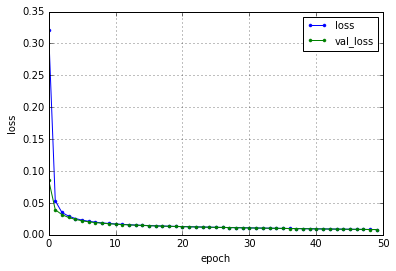

hiden node = 32
-edim=32-Window=128-Overlap=16-Adadelta
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0722 - val_loss: 0.0225
Epoch 2/50
1s - loss: 0.0104 - val_loss: 0.0080
Epoch 3/50
1s - loss: 0.0073 - val_loss: 0.0064
Epoch 4/50
1s - loss: 0.0062 - val_loss: 0.0046
Epoch 5/50
1s - loss: 0.0055 - val_loss: 0.0048
Epoch 6/50
1s - loss: 0.0050 - val_loss: 0.0034
Epoch 7/50
1s - loss: 0.0044 - val_loss: 0.0044
Epoch 8/50
1s - loss: 0.0043 - val_loss: 0.0064
Epoch 9/50
1s - loss: 0.0042 - val_loss: 0.0027
Epoch 10/50
1s - loss: 0.0042 - val_loss: 0.0023
Epoch 11/50
1s - loss: 0.0038 - val_loss: 0.0027
Epoch 12/50
1s - loss: 0.0038 - val_loss: 0.0024
Epoch 13/50
1s - loss: 0.0039 - val_loss: 0.0023
Epoch 14/50
0s - loss: 0.0038 - val_loss: 0.0052
Epoch 15/50
0s - loss: 0.0036 - val_loss: 0.0033
Epoch 16/50
0s - loss: 0.0031 - val_loss: 0.0021
Epoch 17/50
1s - loss: 0.0036 - val_loss: 0.0055
Epoch 18/50
1s - loss: 0.0035 - val_loss: 0.0019
Epoch 19/50
1s - loss

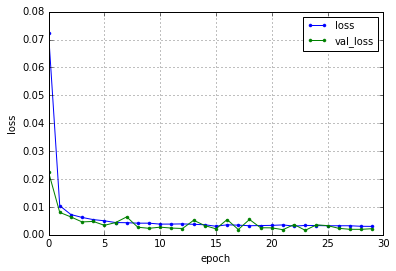

hiden node = 32
-edim=32-Window=128-Overlap=16-Adamax
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0434 - val_loss: 0.0120
Epoch 2/50
1s - loss: 0.0094 - val_loss: 0.0072
Epoch 3/50
1s - loss: 0.0058 - val_loss: 0.0046
Epoch 4/50
1s - loss: 0.0041 - val_loss: 0.0039
Epoch 5/50
1s - loss: 0.0030 - val_loss: 0.0027
Epoch 6/50
1s - loss: 0.0023 - val_loss: 0.0021
Epoch 7/50
1s - loss: 0.0018 - val_loss: 0.0025
Epoch 8/50
1s - loss: 0.0014 - val_loss: 0.0011
Epoch 9/50
1s - loss: 0.0010 - val_loss: 7.4677e-04
Epoch 10/50
1s - loss: 8.2970e-04 - val_loss: 0.0014
Epoch 11/50
1s - loss: 7.1314e-04 - val_loss: 4.8054e-04
Epoch 12/50
1s - loss: 6.6805e-04 - val_loss: 5.3409e-04
Epoch 13/50
1s - loss: 5.7546e-04 - val_loss: 3.8246e-04
Epoch 14/50
1s - loss: 5.3991e-04 - val_loss: 4.0994e-04
Epoch 15/50
1s - loss: 5.1261e-04 - val_loss: 3.7816e-04
Epoch 16/50
1s - loss: 4.8801e-04 - val_loss: 4.7305e-04
Epoch 17/50
1s - loss: 4.7621e-04 - val_loss: 2.9999e-04
Epoch 18

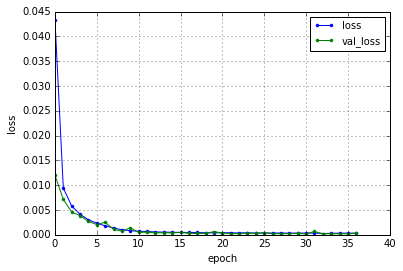

hiden node = 32
-edim=32-Window=128-Overlap=16-Adam
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0493 - val_loss: 0.0086
Epoch 2/50
1s - loss: 0.0060 - val_loss: 0.0053
Epoch 3/50
1s - loss: 0.0036 - val_loss: 0.0039
Epoch 4/50
1s - loss: 0.0026 - val_loss: 0.0021
Epoch 5/50
1s - loss: 0.0021 - val_loss: 0.0015
Epoch 6/50
1s - loss: 0.0017 - val_loss: 0.0028
Epoch 7/50
1s - loss: 0.0015 - val_loss: 0.0011
Epoch 8/50
1s - loss: 0.0011 - val_loss: 9.0421e-04
Epoch 9/50
1s - loss: 0.0011 - val_loss: 7.3035e-04
Epoch 10/50
1s - loss: 0.0011 - val_loss: 6.4921e-04
Epoch 11/50
1s - loss: 8.5169e-04 - val_loss: 5.9957e-04
Epoch 12/50
1s - loss: 9.1631e-04 - val_loss: 5.1593e-04
Epoch 13/50
1s - loss: 6.5614e-04 - val_loss: 4.9840e-04
Epoch 14/50
1s - loss: 7.3155e-04 - val_loss: 5.3756e-04
Epoch 15/50
1s - loss: 6.8824e-04 - val_loss: 8.7162e-04
Epoch 16/50
1s - loss: 6.2458e-04 - val_loss: 8.2913e-04
Epoch 17/50
1s - loss: 5.9021e-04 - val_loss: 5.7435e-04
Epoch 

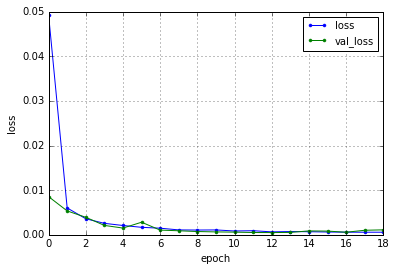

hiden node = 32
-edim=32-Window=128-Overlap=16-Adagrad
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
2s - loss: 0.0218 - val_loss: 0.0091
Epoch 2/50
2s - loss: 0.0074 - val_loss: 0.0059
Epoch 3/50
2s - loss: 0.0055 - val_loss: 0.0052
Epoch 4/50
2s - loss: 0.0044 - val_loss: 0.0037
Epoch 5/50
2s - loss: 0.0038 - val_loss: 0.0036
Epoch 6/50
1s - loss: 0.0034 - val_loss: 0.0030
Epoch 7/50
2s - loss: 0.0031 - val_loss: 0.0027
Epoch 8/50
2s - loss: 0.0028 - val_loss: 0.0025
Epoch 9/50
2s - loss: 0.0026 - val_loss: 0.0023
Epoch 10/50
1s - loss: 0.0025 - val_loss: 0.0021
Epoch 11/50
1s - loss: 0.0023 - val_loss: 0.0020
Epoch 12/50
1s - loss: 0.0021 - val_loss: 0.0019
Epoch 13/50
1s - loss: 0.0020 - val_loss: 0.0022
Epoch 14/50
1s - loss: 0.0020 - val_loss: 0.0017
Epoch 15/50
1s - loss: 0.0018 - val_loss: 0.0016
Epoch 16/50
1s - loss: 0.0018 - val_loss: 0.0017
Epoch 17/50
1s - loss: 0.0017 - val_loss: 0.0017
Epoch 18/50
1s - loss: 0.0016 - val_loss: 0.0020
Epoch 19/50
1s - loss:

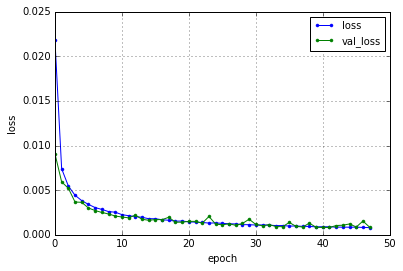

hiden node = 32
-edim=32-Window=128-Overlap=16-RMSprop
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
2s - loss: 0.0321 - val_loss: 0.0157
Epoch 2/50
2s - loss: 0.0100 - val_loss: 0.0060
Epoch 3/50
2s - loss: 0.0092 - val_loss: 0.0066
Epoch 4/50
2s - loss: 0.0087 - val_loss: 0.0104
Epoch 5/50
2s - loss: 0.0083 - val_loss: 0.0111
Epoch 6/50
2s - loss: 0.0081 - val_loss: 0.0076
Epoch 7/50
1s - loss: 0.0079 - val_loss: 0.0047
Epoch 8/50
1s - loss: 0.0078 - val_loss: 0.0039
Epoch 9/50
1s - loss: 0.0076 - val_loss: 0.0082
Epoch 10/50
2s - loss: 0.0074 - val_loss: 0.0210
Epoch 11/50
2s - loss: 0.0072 - val_loss: 0.0087
Epoch 12/50
2s - loss: 0.0071 - val_loss: 0.0087
Epoch 13/50
2s - loss: 0.0069 - val_loss: 0.0053
Epoch 14/50
2s - loss: 0.0067 - val_loss: 0.0030
Epoch 15/50
2s - loss: 0.0068 - val_loss: 0.0052
Epoch 16/50
2s - loss: 0.0066 - val_loss: 0.0058
Epoch 17/50
2s - loss: 0.0064 - val_loss: 0.0119
Epoch 18/50
2s - loss: 0.0062 - val_loss: 0.0148
Epoch 19/50
2s - loss:

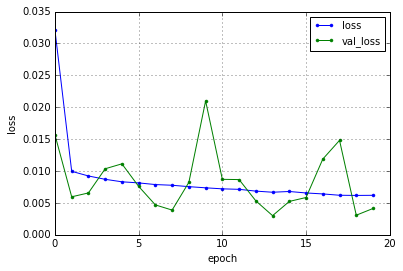

hiden node = 32
-edim=32-Window=128-Overlap=16-Nadam
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
2s - loss: 0.0323 - val_loss: 0.0193
Epoch 2/50
2s - loss: 0.0105 - val_loss: 0.0067
Epoch 3/50
2s - loss: 0.0090 - val_loss: 0.0057
Epoch 4/50
2s - loss: 0.0079 - val_loss: 0.0041
Epoch 5/50
2s - loss: 0.0070 - val_loss: 0.0043
Epoch 6/50
1s - loss: 0.0060 - val_loss: 0.0027
Epoch 7/50
1s - loss: 0.0056 - val_loss: 0.0071
Epoch 8/50
2s - loss: 0.0048 - val_loss: 0.0044
Epoch 9/50
2s - loss: 0.0046 - val_loss: 0.0037
Epoch 10/50
1s - loss: 0.0042 - val_loss: 0.0037
Epoch 11/50
1s - loss: 0.0038 - val_loss: 0.0067
Epoch 12/50
1s - loss: 0.0034 - val_loss: 0.0028


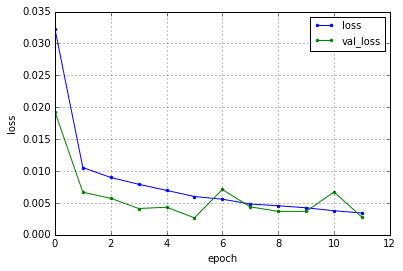

AccX is registed now
Build Complete
(254742,)
windowData's num =15906
SourceData's aborting data = 6
window shape is (15906, 256, 1)
hiden node = 32
-edim=32-Window=256-Overlap=16-SGD
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.4806 - val_loss: 0.2255
Epoch 2/50
1s - loss: 0.1315 - val_loss: 0.0791
Epoch 3/50
1s - loss: 0.0630 - val_loss: 0.0527
Epoch 4/50
1s - loss: 0.0474 - val_loss: 0.0433
Epoch 5/50
1s - loss: 0.0406 - val_loss: 0.0383
Epoch 6/50
1s - loss: 0.0366 - val_loss: 0.0352
Epoch 7/50
1s - loss: 0.0341 - val_loss: 0.0331
Epoch 8/50
1s - loss: 0.0322 - val_loss: 0.0315
Epoch 9/50
1s - loss: 0.0308 - val_loss: 0.0302
Epoch 10/50
1s - loss: 0.0297 - val_loss: 0.0292
Epoch 11/50
1s - loss: 0.0287 - val_loss: 0.0283
Epoch 12/50
1s - loss: 0.0279 - val_loss: 0.0276
Epoch 13/50
1s - loss: 0.0272 - val_loss: 0.0269
Epoch 14/50
1s - loss: 0.0266 - val_loss: 0.0263
Epoch 15/50
1s - loss: 0.0261 - val_loss: 0.0258
Epoch 16/50
1s - loss: 0.0256 - val_loss

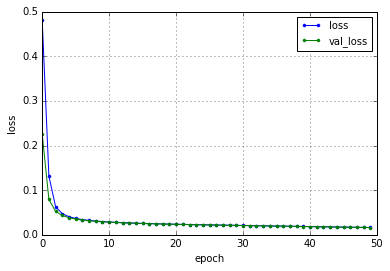

hiden node = 32
-edim=32-Window=256-Overlap=16-Adadelta
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
2s - loss: 0.0784 - val_loss: 0.0210
Epoch 2/50
2s - loss: 0.0179 - val_loss: 0.0291
Epoch 3/50
2s - loss: 0.0132 - val_loss: 0.0197
Epoch 4/50
2s - loss: 0.0107 - val_loss: 0.0103
Epoch 5/50
2s - loss: 0.0096 - val_loss: 0.0194
Epoch 6/50
2s - loss: 0.0090 - val_loss: 0.0163
Epoch 7/50
2s - loss: 0.0086 - val_loss: 0.0070
Epoch 8/50
2s - loss: 0.0080 - val_loss: 0.0061
Epoch 9/50
2s - loss: 0.0080 - val_loss: 0.0053
Epoch 10/50
2s - loss: 0.0078 - val_loss: 0.0049
Epoch 11/50
2s - loss: 0.0075 - val_loss: 0.0214
Epoch 12/50
2s - loss: 0.0076 - val_loss: 0.0158
Epoch 13/50
2s - loss: 0.0070 - val_loss: 0.0103
Epoch 14/50
2s - loss: 0.0074 - val_loss: 0.0112
Epoch 15/50
2s - loss: 0.0070 - val_loss: 0.0063
Epoch 16/50
2s - loss: 0.0068 - val_loss: 0.0200


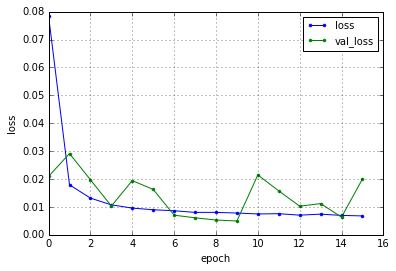

hiden node = 32
-edim=32-Window=256-Overlap=16-Adamax
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.0435 - val_loss: 0.0142
Epoch 2/50
1s - loss: 0.0106 - val_loss: 0.0080
Epoch 3/50
2s - loss: 0.0067 - val_loss: 0.0055
Epoch 4/50
2s - loss: 0.0049 - val_loss: 0.0038
Epoch 5/50
2s - loss: 0.0035 - val_loss: 0.0068
Epoch 6/50
1s - loss: 0.0027 - val_loss: 0.0053
Epoch 7/50
1s - loss: 0.0022 - val_loss: 0.0061
Epoch 8/50
1s - loss: 0.0017 - val_loss: 0.0016
Epoch 9/50
1s - loss: 0.0015 - val_loss: 0.0012
Epoch 10/50
1s - loss: 0.0013 - val_loss: 0.0011
Epoch 11/50
1s - loss: 0.0012 - val_loss: 0.0012
Epoch 12/50
1s - loss: 0.0011 - val_loss: 9.1560e-04
Epoch 13/50
1s - loss: 9.3657e-04 - val_loss: 0.0013
Epoch 14/50
1s - loss: 8.9903e-04 - val_loss: 6.1363e-04
Epoch 15/50
1s - loss: 8.3981e-04 - val_loss: 0.0014
Epoch 16/50
1s - loss: 8.2821e-04 - val_loss: 8.9367e-04
Epoch 17/50
1s - loss: 7.8061e-04 - val_loss: 7.2773e-04
Epoch 18/50
1s - loss: 7.5629e-04 - 

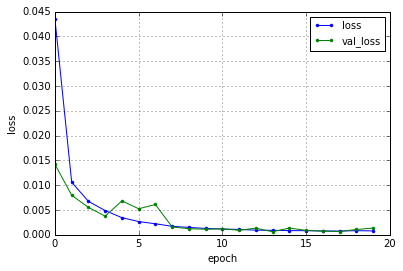

hiden node = 32
-edim=32-Window=256-Overlap=16-Adam
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.0443 - val_loss: 0.0100
Epoch 2/50
1s - loss: 0.0074 - val_loss: 0.0054
Epoch 3/50
1s - loss: 0.0048 - val_loss: 0.0049
Epoch 4/50
1s - loss: 0.0036 - val_loss: 0.0037
Epoch 5/50
1s - loss: 0.0029 - val_loss: 0.0028
Epoch 6/50
1s - loss: 0.0024 - val_loss: 0.0024
Epoch 7/50
1s - loss: 0.0021 - val_loss: 0.0016
Epoch 8/50
1s - loss: 0.0018 - val_loss: 0.0014
Epoch 9/50
1s - loss: 0.0017 - val_loss: 0.0012
Epoch 10/50
1s - loss: 0.0015 - val_loss: 0.0017
Epoch 11/50
1s - loss: 0.0014 - val_loss: 0.0012
Epoch 12/50
1s - loss: 0.0013 - val_loss: 8.5777e-04
Epoch 13/50
1s - loss: 0.0013 - val_loss: 0.0056
Epoch 14/50
1s - loss: 0.0012 - val_loss: 7.6719e-04
Epoch 15/50
1s - loss: 0.0012 - val_loss: 0.0017
Epoch 16/50
1s - loss: 0.0011 - val_loss: 0.0041
Epoch 17/50
1s - loss: 0.0011 - val_loss: 0.0032
Epoch 18/50
1s - loss: 9.9250e-04 - val_loss: 6.9359e-04
Epoch 19/

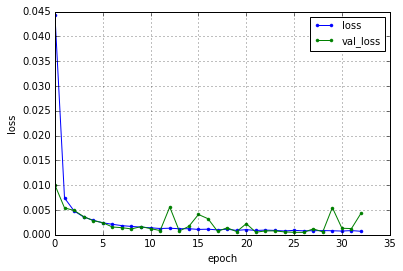

hiden node = 32
-edim=32-Window=256-Overlap=16-Adagrad
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.0292 - val_loss: 0.0210
Epoch 2/50
1s - loss: 0.0114 - val_loss: 0.0087
Epoch 3/50
1s - loss: 0.0085 - val_loss: 0.0082
Epoch 4/50
1s - loss: 0.0072 - val_loss: 0.0109
Epoch 5/50
1s - loss: 0.0064 - val_loss: 0.0074
Epoch 6/50
1s - loss: 0.0058 - val_loss: 0.0058
Epoch 7/50
1s - loss: 0.0053 - val_loss: 0.0044
Epoch 8/50
1s - loss: 0.0046 - val_loss: 0.0046
Epoch 9/50
1s - loss: 0.0046 - val_loss: 0.0043
Epoch 10/50
1s - loss: 0.0042 - val_loss: 0.0071
Epoch 11/50
1s - loss: 0.0040 - val_loss: 0.0050
Epoch 12/50
1s - loss: 0.0038 - val_loss: 0.0033
Epoch 13/50
1s - loss: 0.0036 - val_loss: 0.0040
Epoch 14/50
1s - loss: 0.0033 - val_loss: 0.0033
Epoch 15/50
1s - loss: 0.0034 - val_loss: 0.0040
Epoch 16/50
1s - loss: 0.0032 - val_loss: 0.0044
Epoch 17/50
1s - loss: 0.0029 - val_loss: 0.0046
Epoch 18/50
1s - loss: 0.0030 - val_loss: 0.0047


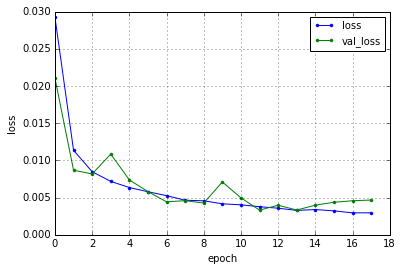

hiden node = 32
-edim=32-Window=256-Overlap=16-RMSprop
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.0400 - val_loss: 0.0142
Epoch 2/50
1s - loss: 0.0159 - val_loss: 0.0120
Epoch 3/50
1s - loss: 0.0145 - val_loss: 0.0373
Epoch 4/50
1s - loss: 0.0138 - val_loss: 0.0273
Epoch 5/50
1s - loss: 0.0131 - val_loss: 0.0093
Epoch 6/50
1s - loss: 0.0128 - val_loss: 0.0093
Epoch 7/50
1s - loss: 0.0124 - val_loss: 0.0175
Epoch 8/50
1s - loss: 0.0121 - val_loss: 0.0061
Epoch 9/50
1s - loss: 0.0121 - val_loss: 0.0171
Epoch 10/50
1s - loss: 0.0117 - val_loss: 0.0323
Epoch 11/50
1s - loss: 0.0115 - val_loss: 0.0122
Epoch 12/50
1s - loss: 0.0111 - val_loss: 0.0142
Epoch 13/50
1s - loss: 0.0111 - val_loss: 0.0084
Epoch 14/50
1s - loss: 0.0109 - val_loss: 0.0057
Epoch 15/50
1s - loss: 0.0106 - val_loss: 0.0189
Epoch 16/50
1s - loss: 0.0105 - val_loss: 0.0158
Epoch 17/50
1s - loss: 0.0102 - val_loss: 0.0100
Epoch 18/50
1s - loss: 0.0100 - val_loss: 0.0081
Epoch 19/50
2s - loss:

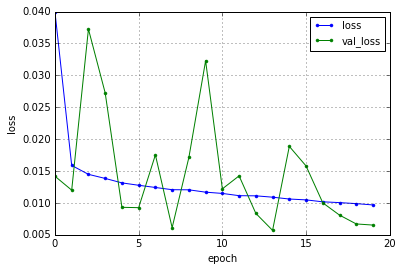

hiden node = 32
-edim=32-Window=256-Overlap=16-Nadam
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
2s - loss: 0.0399 - val_loss: 0.0251
Epoch 2/50
1s - loss: 0.0168 - val_loss: 0.0152
Epoch 3/50
1s - loss: 0.0142 - val_loss: 0.0338
Epoch 4/50
1s - loss: 0.0127 - val_loss: 0.0188
Epoch 5/50
2s - loss: 0.0117 - val_loss: 0.0057
Epoch 6/50
2s - loss: 0.0100 - val_loss: 0.0070
Epoch 7/50
2s - loss: 0.0092 - val_loss: 0.0115
Epoch 8/50
2s - loss: 0.0084 - val_loss: 0.0060
Epoch 9/50
1s - loss: 0.0076 - val_loss: 0.0082
Epoch 10/50
1s - loss: 0.0069 - val_loss: 0.0036
Epoch 11/50
1s - loss: 0.0064 - val_loss: 0.0195
Epoch 12/50
1s - loss: 0.0060 - val_loss: 0.0046
Epoch 13/50
1s - loss: 0.0055 - val_loss: 0.0183
Epoch 14/50
1s - loss: 0.0051 - val_loss: 0.0036
Epoch 15/50
1s - loss: 0.0049 - val_loss: 0.0072
Epoch 16/50
1s - loss: 0.0047 - val_loss: 0.0027
Epoch 17/50
1s - loss: 0.0041 - val_loss: 0.0035
Epoch 18/50
2s - loss: 0.0042 - val_loss: 0.0023
Epoch 19/50
2s - loss: 0

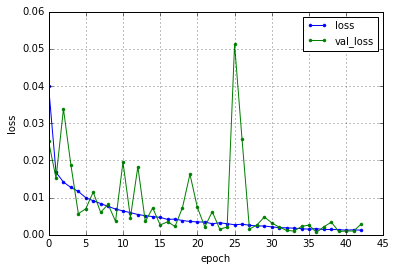

AccX is registed now
Build Complete
(254742,)
windowData's num =15890
SourceData's aborting data = 6
window shape is (15890, 512, 1)
hiden node = 32
-edim=32-Window=512-Overlap=16-SGD
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.5704 - val_loss: 0.3817
Epoch 2/50
1s - loss: 0.2653 - val_loss: 0.1800
Epoch 3/50
2s - loss: 0.1369 - val_loss: 0.1059
Epoch 4/50
2s - loss: 0.0894 - val_loss: 0.0769
Epoch 5/50
1s - loss: 0.0692 - val_loss: 0.0631
Epoch 6/50
1s - loss: 0.0590 - val_loss: 0.0556
Epoch 7/50
1s - loss: 0.0532 - val_loss: 0.0512
Epoch 8/50
1s - loss: 0.0496 - val_loss: 0.0482
Epoch 9/50
1s - loss: 0.0471 - val_loss: 0.0461
Epoch 10/50
2s - loss: 0.0453 - val_loss: 0.0446
Epoch 11/50
2s - loss: 0.0439 - val_loss: 0.0433
Epoch 12/50
2s - loss: 0.0428 - val_loss: 0.0423
Epoch 13/50
2s - loss: 0.0418 - val_loss: 0.0414
Epoch 14/50
1s - loss: 0.0410 - val_loss: 0.0406
Epoch 15/50
1s - loss: 0.0403 - val_loss: 0.0400
Epoch 16/50
2s - loss: 0.0397 - val_loss

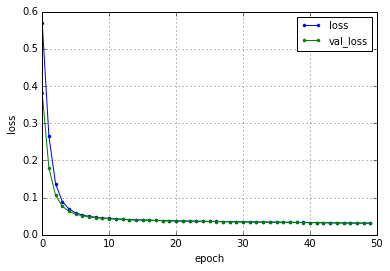

hiden node = 32
-edim=32-Window=512-Overlap=16-Adadelta
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0834 - val_loss: 0.0513
Epoch 2/50
1s - loss: 0.0263 - val_loss: 0.0177
Epoch 3/50
1s - loss: 0.0194 - val_loss: 0.0165
Epoch 4/50
1s - loss: 0.0175 - val_loss: 0.0270
Epoch 5/50
1s - loss: 0.0160 - val_loss: 0.0144
Epoch 6/50
2s - loss: 0.0148 - val_loss: 0.0111
Epoch 7/50
1s - loss: 0.0140 - val_loss: 0.0106
Epoch 8/50
1s - loss: 0.0134 - val_loss: 0.0097
Epoch 9/50
1s - loss: 0.0128 - val_loss: 0.0096
Epoch 10/50
1s - loss: 0.0125 - val_loss: 0.0099
Epoch 11/50
1s - loss: 0.0120 - val_loss: 0.0084
Epoch 12/50
1s - loss: 0.0117 - val_loss: 0.0085
Epoch 13/50
1s - loss: 0.0113 - val_loss: 0.0147
Epoch 14/50
1s - loss: 0.0113 - val_loss: 0.0116
Epoch 15/50
1s - loss: 0.0109 - val_loss: 0.0139
Epoch 16/50
1s - loss: 0.0110 - val_loss: 0.0071
Epoch 17/50
2s - loss: 0.0107 - val_loss: 0.0216
Epoch 18/50
2s - loss: 0.0107 - val_loss: 0.0160
Epoch 19/50
2s - loss

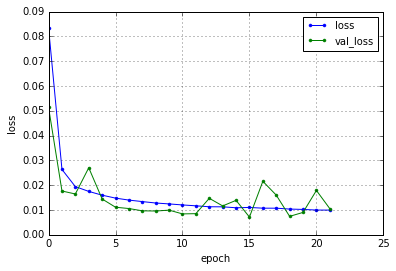

hiden node = 32
-edim=32-Window=512-Overlap=16-Adamax
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
2s - loss: 0.0483 - val_loss: 0.0221
Epoch 2/50
1s - loss: 0.0154 - val_loss: 0.0108
Epoch 3/50
1s - loss: 0.0091 - val_loss: 0.0091
Epoch 4/50
2s - loss: 0.0065 - val_loss: 0.0054
Epoch 5/50
1s - loss: 0.0051 - val_loss: 0.0051
Epoch 6/50
1s - loss: 0.0041 - val_loss: 0.0035
Epoch 7/50
1s - loss: 0.0032 - val_loss: 0.0026
Epoch 8/50
1s - loss: 0.0028 - val_loss: 0.0021
Epoch 9/50
1s - loss: 0.0026 - val_loss: 0.0033
Epoch 10/50
1s - loss: 0.0023 - val_loss: 0.0020
Epoch 11/50
1s - loss: 0.0021 - val_loss: 0.0015
Epoch 12/50
1s - loss: 0.0020 - val_loss: 0.0034
Epoch 13/50
2s - loss: 0.0017 - val_loss: 0.0017
Epoch 14/50
1s - loss: 0.0018 - val_loss: 0.0014
Epoch 15/50
1s - loss: 0.0018 - val_loss: 0.0014
Epoch 16/50
1s - loss: 0.0017 - val_loss: 0.0017
Epoch 17/50
1s - loss: 0.0016 - val_loss: 0.0017
Epoch 18/50
1s - loss: 0.0016 - val_loss: 0.0013
Epoch 19/50
1s - loss: 

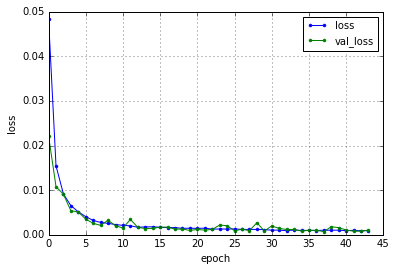

hiden node = 32
-edim=32-Window=512-Overlap=16-Adam
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0482 - val_loss: 0.0145
Epoch 2/50
2s - loss: 0.0109 - val_loss: 0.0076
Epoch 3/50
1s - loss: 0.0068 - val_loss: 0.0050
Epoch 4/50
2s - loss: 0.0055 - val_loss: 0.0041
Epoch 5/50
1s - loss: 0.0043 - val_loss: 0.0041
Epoch 6/50
1s - loss: 0.0040 - val_loss: 0.0029
Epoch 7/50
1s - loss: 0.0034 - val_loss: 0.0045
Epoch 8/50
1s - loss: 0.0030 - val_loss: 0.0037
Epoch 9/50
1s - loss: 0.0027 - val_loss: 0.0030
Epoch 10/50
2s - loss: 0.0024 - val_loss: 0.0051
Epoch 11/50
1s - loss: 0.0024 - val_loss: 0.0017
Epoch 12/50
1s - loss: 0.0024 - val_loss: 0.0049
Epoch 13/50
1s - loss: 0.0022 - val_loss: 0.0033
Epoch 14/50
0s - loss: 0.0021 - val_loss: 0.0041
Epoch 15/50
1s - loss: 0.0020 - val_loss: 0.0022
Epoch 16/50
1s - loss: 0.0020 - val_loss: 0.0013
Epoch 17/50
1s - loss: 0.0016 - val_loss: 0.0036
Epoch 18/50
1s - loss: 0.0017 - val_loss: 0.0026
Epoch 19/50
2s - loss: 0.

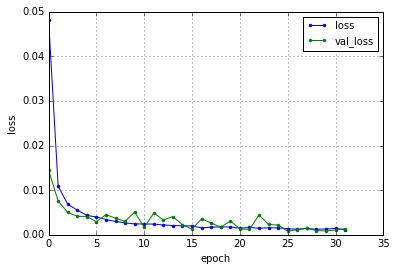

hiden node = 32
-edim=32-Window=512-Overlap=16-Adagrad
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0479 - val_loss: 0.0245
Epoch 2/50
1s - loss: 0.0203 - val_loss: 0.0160
Epoch 3/50
1s - loss: 0.0154 - val_loss: 0.0124
Epoch 4/50
1s - loss: 0.0127 - val_loss: 0.0119
Epoch 5/50
1s - loss: 0.0109 - val_loss: 0.0111
Epoch 6/50
1s - loss: 0.0098 - val_loss: 0.0119
Epoch 7/50
1s - loss: 0.0089 - val_loss: 0.0115
Epoch 8/50
1s - loss: 0.0083 - val_loss: 0.0092
Epoch 9/50
1s - loss: 0.0077 - val_loss: 0.0063
Epoch 10/50
1s - loss: 0.0073 - val_loss: 0.0063
Epoch 11/50
1s - loss: 0.0068 - val_loss: 0.0126
Epoch 12/50
1s - loss: 0.0065 - val_loss: 0.0053
Epoch 13/50
2s - loss: 0.0062 - val_loss: 0.0057
Epoch 14/50
1s - loss: 0.0057 - val_loss: 0.0065
Epoch 15/50
1s - loss: 0.0056 - val_loss: 0.0090
Epoch 16/50
1s - loss: 0.0055 - val_loss: 0.0048
Epoch 17/50
1s - loss: 0.0051 - val_loss: 0.0043
Epoch 18/50
1s - loss: 0.0051 - val_loss: 0.0041
Epoch 19/50
1s - loss:

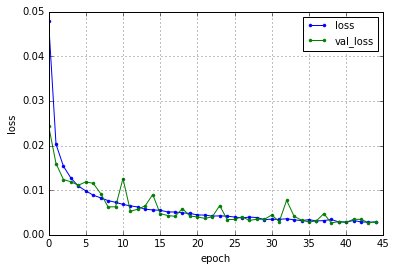

hiden node = 32
-edim=32-Window=512-Overlap=16-RMSprop
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0495 - val_loss: 0.0200
Epoch 2/50
1s - loss: 0.0248 - val_loss: 0.0182
Epoch 3/50
1s - loss: 0.0223 - val_loss: 0.0203
Epoch 4/50
1s - loss: 0.0210 - val_loss: 0.0511
Epoch 5/50
0s - loss: 0.0201 - val_loss: 0.0245
Epoch 6/50
1s - loss: 0.0193 - val_loss: 0.0185
Epoch 7/50
1s - loss: 0.0184 - val_loss: 0.0116
Epoch 8/50
1s - loss: 0.0178 - val_loss: 0.0119
Epoch 9/50
1s - loss: 0.0172 - val_loss: 0.0172
Epoch 10/50
1s - loss: 0.0165 - val_loss: 0.0150
Epoch 11/50
1s - loss: 0.0161 - val_loss: 0.0102
Epoch 12/50
1s - loss: 0.0155 - val_loss: 0.0165
Epoch 13/50
1s - loss: 0.0149 - val_loss: 0.0232
Epoch 14/50
1s - loss: 0.0146 - val_loss: 0.0110
Epoch 15/50
1s - loss: 0.0143 - val_loss: 0.0093
Epoch 16/50
1s - loss: 0.0140 - val_loss: 0.0110
Epoch 17/50
1s - loss: 0.0137 - val_loss: 0.0165
Epoch 18/50
1s - loss: 0.0134 - val_loss: 0.0181
Epoch 19/50
1s - loss:

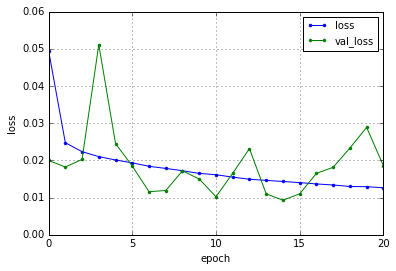

hiden node = 32
-edim=32-Window=512-Overlap=16-Nadam
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0535 - val_loss: 0.0283
Epoch 2/50
0s - loss: 0.0289 - val_loss: 0.0301
Epoch 3/50
1s - loss: 0.0232 - val_loss: 0.0395
Epoch 4/50
1s - loss: 0.0188 - val_loss: 0.0115
Epoch 5/50
1s - loss: 0.0157 - val_loss: 0.0201
Epoch 6/50
1s - loss: 0.0158 - val_loss: 0.0253
Epoch 7/50
1s - loss: 0.0153 - val_loss: 0.0195
Epoch 8/50
2s - loss: 0.0129 - val_loss: 0.0091
Epoch 9/50
2s - loss: 0.0125 - val_loss: 0.0077
Epoch 10/50
2s - loss: 0.0117 - val_loss: 0.0079
Epoch 11/50
1s - loss: 0.0107 - val_loss: 0.0110
Epoch 12/50
1s - loss: 0.0102 - val_loss: 0.0061
Epoch 13/50
2s - loss: 0.0094 - val_loss: 0.0065
Epoch 14/50
2s - loss: 0.0095 - val_loss: 0.0100
Epoch 15/50
1s - loss: 0.0083 - val_loss: 0.0131
Epoch 16/50
1s - loss: 0.0079 - val_loss: 0.0052
Epoch 17/50
1s - loss: 0.0073 - val_loss: 0.0064
Epoch 18/50
1s - loss: 0.0069 - val_loss: 0.0078
Epoch 19/50
1s - loss: 0

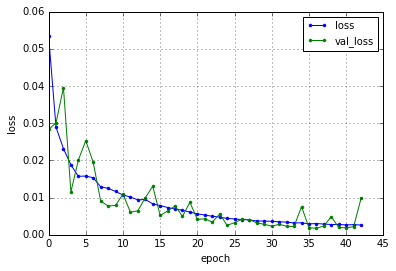

AccX is registed now
Build Complete
(254742,)
windowData's num =15858
SourceData's aborting data = 6
window shape is (15858, 1024, 1)
hiden node = 32
-edim=32-Window=1024-Overlap=16-SGD
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.6541 - val_loss: 0.5365
Epoch 2/50
1s - loss: 0.4347 - val_loss: 0.3469
Epoch 3/50
1s - loss: 0.2856 - val_loss: 0.2343
Epoch 4/50
1s - loss: 0.1990 - val_loss: 0.1693
Epoch 5/50
2s - loss: 0.1483 - val_loss: 0.1304
Epoch 6/50
1s - loss: 0.1172 - val_loss: 0.1058
Epoch 7/50
2s - loss: 0.0973 - val_loss: 0.0898
Epoch 8/50
1s - loss: 0.0841 - val_loss: 0.0791
Epoch 9/50
1s - loss: 0.0752 - val_loss: 0.0717
Epoch 10/50
1s - loss: 0.0689 - val_loss: 0.0664
Epoch 11/50
1s - loss: 0.0644 - val_loss: 0.0625
Epoch 12/50
1s - loss: 0.0610 - val_loss: 0.0596
Epoch 13/50
1s - loss: 0.0584 - val_loss: 0.0573
Epoch 14/50
1s - loss: 0.0563 - val_loss: 0.0554
Epoch 15/50
1s - loss: 0.0546 - val_loss: 0.0539
Epoch 16/50
1s - loss: 0.0532 - val_lo

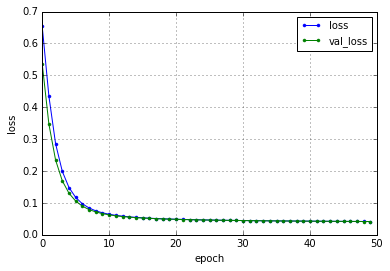

hiden node = 32
-edim=32-Window=1024-Overlap=16-Adadelta
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0915 - val_loss: 0.0411
Epoch 2/50
1s - loss: 0.0421 - val_loss: 0.0455
Epoch 3/50
1s - loss: 0.0355 - val_loss: 0.0393
Epoch 4/50
1s - loss: 0.0300 - val_loss: 0.0322
Epoch 5/50
2s - loss: 0.0279 - val_loss: 0.0255
Epoch 6/50
1s - loss: 0.0259 - val_loss: 0.0234
Epoch 7/50
1s - loss: 0.0243 - val_loss: 0.0200
Epoch 8/50
1s - loss: 0.0230 - val_loss: 0.0187
Epoch 9/50
1s - loss: 0.0220 - val_loss: 0.0431
Epoch 10/50
2s - loss: 0.0212 - val_loss: 0.0194
Epoch 11/50
1s - loss: 0.0202 - val_loss: 0.0190
Epoch 12/50
1s - loss: 0.0194 - val_loss: 0.0154
Epoch 13/50
1s - loss: 0.0192 - val_loss: 0.0233
Epoch 14/50
1s - loss: 0.0189 - val_loss: 0.0188
Epoch 15/50
1s - loss: 0.0186 - val_loss: 0.0242
Epoch 16/50
1s - loss: 0.0184 - val_loss: 0.0142
Epoch 17/50
1s - loss: 0.0179 - val_loss: 0.0172
Epoch 18/50
1s - loss: 0.0176 - val_loss: 0.0152
Epoch 19/50
1s - los

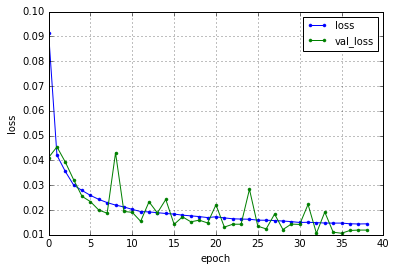

hiden node = 32
-edim=32-Window=1024-Overlap=16-Adamax
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0567 - val_loss: 0.0304
Epoch 2/50
1s - loss: 0.0232 - val_loss: 0.0172
Epoch 3/50
1s - loss: 0.0151 - val_loss: 0.0114
Epoch 4/50
1s - loss: 0.0105 - val_loss: 0.0082
Epoch 5/50
1s - loss: 0.0084 - val_loss: 0.0085
Epoch 6/50
1s - loss: 0.0065 - val_loss: 0.0055
Epoch 7/50
1s - loss: 0.0055 - val_loss: 0.0042
Epoch 8/50
1s - loss: 0.0050 - val_loss: 0.0039
Epoch 9/50
1s - loss: 0.0046 - val_loss: 0.0035
Epoch 10/50
1s - loss: 0.0041 - val_loss: 0.0033
Epoch 11/50
1s - loss: 0.0039 - val_loss: 0.0029
Epoch 12/50
1s - loss: 0.0038 - val_loss: 0.0029
Epoch 13/50
1s - loss: 0.0036 - val_loss: 0.0029
Epoch 14/50
1s - loss: 0.0033 - val_loss: 0.0026
Epoch 15/50
1s - loss: 0.0031 - val_loss: 0.0024
Epoch 16/50
1s - loss: 0.0032 - val_loss: 0.0030
Epoch 17/50
1s - loss: 0.0033 - val_loss: 0.0036
Epoch 18/50
1s - loss: 0.0029 - val_loss: 0.0026
Epoch 19/50
1s - loss:

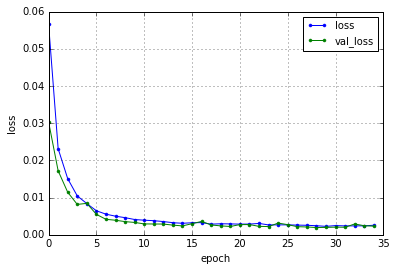

hiden node = 32
-edim=32-Window=1024-Overlap=16-Adam
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0587 - val_loss: 0.0250
Epoch 2/50
1s - loss: 0.0176 - val_loss: 0.0120
Epoch 3/50
1s - loss: 0.0123 - val_loss: 0.0102
Epoch 4/50
1s - loss: 0.0094 - val_loss: 0.0114
Epoch 5/50
1s - loss: 0.0079 - val_loss: 0.0060
Epoch 6/50
1s - loss: 0.0066 - val_loss: 0.0060
Epoch 7/50
1s - loss: 0.0060 - val_loss: 0.0082
Epoch 8/50
1s - loss: 0.0062 - val_loss: 0.0129
Epoch 9/50
1s - loss: 0.0053 - val_loss: 0.0037
Epoch 10/50
1s - loss: 0.0049 - val_loss: 0.0068
Epoch 11/50
1s - loss: 0.0049 - val_loss: 0.0054
Epoch 12/50
1s - loss: 0.0045 - val_loss: 0.0033
Epoch 13/50
1s - loss: 0.0044 - val_loss: 0.0040
Epoch 14/50
1s - loss: 0.0042 - val_loss: 0.0046
Epoch 15/50
1s - loss: 0.0040 - val_loss: 0.0027
Epoch 16/50
1s - loss: 0.0037 - val_loss: 0.0026
Epoch 17/50
1s - loss: 0.0041 - val_loss: 0.0033
Epoch 18/50
1s - loss: 0.0036 - val_loss: 0.0030
Epoch 19/50
1s - loss: 0

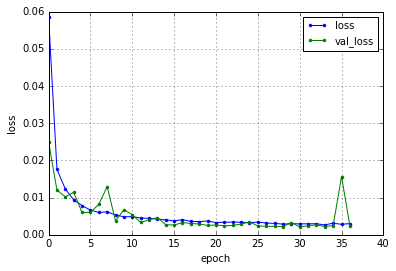

hiden node = 32
-edim=32-Window=1024-Overlap=16-Adagrad
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0628 - val_loss: 0.0409
Epoch 2/50
1s - loss: 0.0329 - val_loss: 0.0234
Epoch 3/50
1s - loss: 0.0242 - val_loss: 0.0429
Epoch 4/50
1s - loss: 0.0201 - val_loss: 0.0168
Epoch 5/50
1s - loss: 0.0173 - val_loss: 0.0170
Epoch 6/50
1s - loss: 0.0155 - val_loss: 0.0132
Epoch 7/50
1s - loss: 0.0141 - val_loss: 0.0116
Epoch 8/50
1s - loss: 0.0129 - val_loss: 0.0105
Epoch 9/50
1s - loss: 0.0120 - val_loss: 0.0102
Epoch 10/50
1s - loss: 0.0113 - val_loss: 0.0105
Epoch 11/50
1s - loss: 0.0107 - val_loss: 0.0091
Epoch 12/50
1s - loss: 0.0101 - val_loss: 0.0082
Epoch 13/50
1s - loss: 0.0094 - val_loss: 0.0098
Epoch 14/50
1s - loss: 0.0093 - val_loss: 0.0096
Epoch 15/50
1s - loss: 0.0088 - val_loss: 0.0090
Epoch 16/50
1s - loss: 0.0085 - val_loss: 0.0072
Epoch 17/50
1s - loss: 0.0083 - val_loss: 0.0069
Epoch 18/50
1s - loss: 0.0079 - val_loss: 0.0089
Epoch 19/50
1s - loss

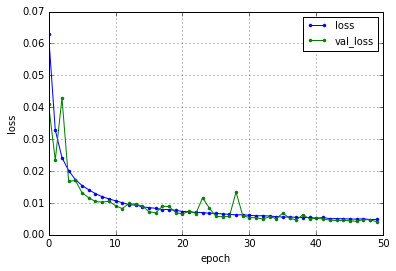

hiden node = 32
-edim=32-Window=1024-Overlap=16-RMSprop
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0701 - val_loss: 0.0397
Epoch 2/50
1s - loss: 0.0403 - val_loss: 0.0814
Epoch 3/50
1s - loss: 0.0364 - val_loss: 0.0335
Epoch 4/50
1s - loss: 0.0341 - val_loss: 0.0471
Epoch 5/50
1s - loss: 0.0316 - val_loss: 0.0310
Epoch 6/50
1s - loss: 0.0303 - val_loss: 0.0200
Epoch 7/50
1s - loss: 0.0287 - val_loss: 0.0472
Epoch 8/50
1s - loss: 0.0275 - val_loss: 0.0209
Epoch 9/50
1s - loss: 0.0263 - val_loss: 0.0219
Epoch 10/50
1s - loss: 0.0247 - val_loss: 0.0195
Epoch 11/50
1s - loss: 0.0246 - val_loss: 0.0315
Epoch 12/50
1s - loss: 0.0234 - val_loss: 0.0189
Epoch 13/50
1s - loss: 0.0226 - val_loss: 0.0195
Epoch 14/50
1s - loss: 0.0219 - val_loss: 0.0196
Epoch 15/50
1s - loss: 0.0211 - val_loss: 0.0373
Epoch 16/50
1s - loss: 0.0206 - val_loss: 0.0299
Epoch 17/50
1s - loss: 0.0201 - val_loss: 0.0145
Epoch 18/50
1s - loss: 0.0196 - val_loss: 0.0166
Epoch 19/50
1s - loss

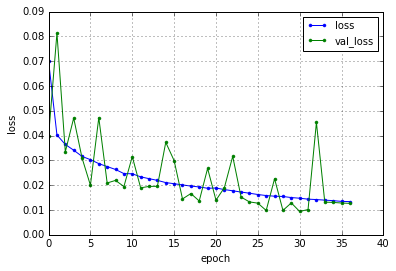

hiden node = 32
-edim=32-Window=1024-Overlap=16-Nadam
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0876 - val_loss: 0.0777
Epoch 2/50
1s - loss: 0.0611 - val_loss: 0.0642
Epoch 3/50
1s - loss: 0.0555 - val_loss: 0.0888
Epoch 4/50
1s - loss: 0.0549 - val_loss: 0.0477
Epoch 5/50
1s - loss: 0.0497 - val_loss: 0.0436
Epoch 6/50
1s - loss: 0.0510 - val_loss: 0.0419
Epoch 7/50
1s - loss: 0.0471 - val_loss: 0.0719
Epoch 8/50
1s - loss: 0.0405 - val_loss: 0.0404
Epoch 9/50
1s - loss: 0.0280 - val_loss: 0.0252
Epoch 10/50
1s - loss: 0.0243 - val_loss: 0.0695
Epoch 11/50
1s - loss: 0.0255 - val_loss: 0.0538
Epoch 12/50
1s - loss: 0.0236 - val_loss: 0.0295
Epoch 13/50
1s - loss: 0.0289 - val_loss: 0.0181
Epoch 14/50
1s - loss: 0.0205 - val_loss: 0.0322
Epoch 15/50
1s - loss: 0.0231 - val_loss: 0.0186
Epoch 16/50
1s - loss: 0.0179 - val_loss: 0.0155
Epoch 17/50
1s - loss: 0.0174 - val_loss: 0.0267
Epoch 18/50
1s - loss: 0.0171 - val_loss: 0.0122
Epoch 19/50
1s - loss: 

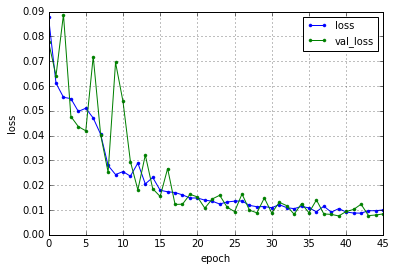

AccX is registed now
Build Complete
(254742,)
windowData's num =15794
SourceData's aborting data = 6
window shape is (15794, 2048, 1)
hiden node = 32
-edim=32-Window=2048-Overlap=16-SGD
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
4s - loss: 0.7101 - val_loss: 0.6431
Epoch 2/50
3s - loss: 0.5766 - val_loss: 0.5134
Epoch 3/50
3s - loss: 0.4601 - val_loss: 0.4112
Epoch 4/50
3s - loss: 0.3710 - val_loss: 0.3342
Epoch 5/50
3s - loss: 0.3040 - val_loss: 0.2763
Epoch 6/50
4s - loss: 0.2534 - val_loss: 0.2324
Epoch 7/50
3s - loss: 0.2148 - val_loss: 0.1986
Epoch 8/50
3s - loss: 0.1849 - val_loss: 0.1722
Epoch 9/50
3s - loss: 0.1615 - val_loss: 0.1515
Epoch 10/50
3s - loss: 0.1430 - val_loss: 0.1351
Epoch 11/50
3s - loss: 0.1283 - val_loss: 0.1220
Epoch 12/50
4s - loss: 0.1166 - val_loss: 0.1116
Epoch 13/50
4s - loss: 0.1072 - val_loss: 0.1031
Epoch 14/50
3s - loss: 0.0996 - val_loss: 0.0962
Epoch 15/50
4s - loss: 0.0933 - val_loss: 0.0906
Epoch 16/50
3s - loss: 0.0882 - val_lo

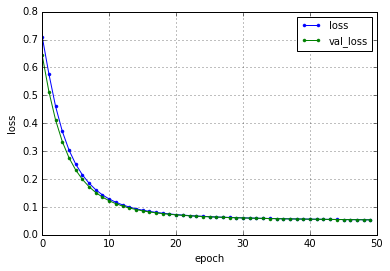

hiden node = 32
-edim=32-Window=2048-Overlap=16-Adadelta
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.1096 - val_loss: 0.0900
Epoch 2/50
4s - loss: 0.0530 - val_loss: 0.0463
Epoch 3/50
4s - loss: 0.0496 - val_loss: 0.0493
Epoch 4/50
3s - loss: 0.0474 - val_loss: 0.0420
Epoch 5/50
3s - loss: 0.0456 - val_loss: 0.0404
Epoch 6/50
3s - loss: 0.0430 - val_loss: 0.0453
Epoch 7/50
3s - loss: 0.0405 - val_loss: 0.0600
Epoch 8/50
3s - loss: 0.0374 - val_loss: 0.0390
Epoch 9/50
3s - loss: 0.0358 - val_loss: 0.0294
Epoch 10/50
4s - loss: 0.0345 - val_loss: 0.0326
Epoch 11/50
3s - loss: 0.0329 - val_loss: 0.0407
Epoch 12/50
3s - loss: 0.0321 - val_loss: 0.0361
Epoch 13/50
3s - loss: 0.0312 - val_loss: 0.0260
Epoch 14/50
4s - loss: 0.0306 - val_loss: 0.0248
Epoch 15/50
4s - loss: 0.0297 - val_loss: 0.0260
Epoch 16/50
3s - loss: 0.0291 - val_loss: 0.0271
Epoch 17/50
4s - loss: 0.0285 - val_loss: 0.0237
Epoch 18/50
4s - loss: 0.0288 - val_loss: 0.0248
Epoch 19/50
3s - los

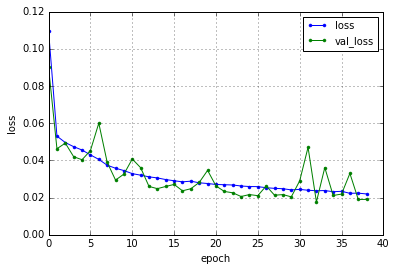

hiden node = 32
-edim=32-Window=2048-Overlap=16-Adamax
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
4s - loss: 0.0686 - val_loss: 0.0406
Epoch 2/50
5s - loss: 0.0333 - val_loss: 0.0278
Epoch 3/50
3s - loss: 0.0235 - val_loss: 0.0203
Epoch 4/50
4s - loss: 0.0184 - val_loss: 0.0176
Epoch 5/50
4s - loss: 0.0137 - val_loss: 0.0106
Epoch 6/50
4s - loss: 0.0114 - val_loss: 0.0087
Epoch 7/50
4s - loss: 0.0098 - val_loss: 0.0123
Epoch 8/50
4s - loss: 0.0092 - val_loss: 0.0073
Epoch 9/50
3s - loss: 0.0084 - val_loss: 0.0071
Epoch 10/50
4s - loss: 0.0076 - val_loss: 0.0079
Epoch 11/50
4s - loss: 0.0077 - val_loss: 0.0057
Epoch 12/50
4s - loss: 0.0075 - val_loss: 0.0092
Epoch 13/50
4s - loss: 0.0079 - val_loss: 0.0063
Epoch 14/50
4s - loss: 0.0070 - val_loss: 0.0059
Epoch 15/50
4s - loss: 0.0066 - val_loss: 0.0065
Epoch 16/50
3s - loss: 0.0061 - val_loss: 0.0051
Epoch 17/50
3s - loss: 0.0060 - val_loss: 0.0047
Epoch 18/50
3s - loss: 0.0060 - val_loss: 0.0053
Epoch 19/50
3s - loss:

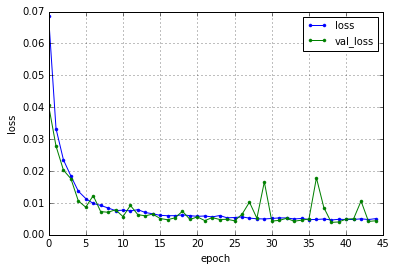

hiden node = 32
-edim=32-Window=2048-Overlap=16-Adam
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
4s - loss: 0.0766 - val_loss: 0.0381
Epoch 2/50
4s - loss: 0.0303 - val_loss: 0.0306
Epoch 3/50
3s - loss: 0.0249 - val_loss: 0.0172
Epoch 4/50
4s - loss: 0.0212 - val_loss: 0.0259
Epoch 5/50
3s - loss: 0.0164 - val_loss: 0.0161
Epoch 6/50
4s - loss: 0.0158 - val_loss: 0.0146
Epoch 7/50
4s - loss: 0.0159 - val_loss: 0.0128
Epoch 8/50
3s - loss: 0.0143 - val_loss: 0.0141
Epoch 9/50
4s - loss: 0.0153 - val_loss: 0.0147
Epoch 10/50
3s - loss: 0.0155 - val_loss: 0.0130
Epoch 11/50
4s - loss: 0.0127 - val_loss: 0.0111
Epoch 12/50
3s - loss: 0.0118 - val_loss: 0.0094
Epoch 13/50
4s - loss: 0.0115 - val_loss: 0.0134
Epoch 14/50
4s - loss: 0.0119 - val_loss: 0.0107
Epoch 15/50
4s - loss: 0.0115 - val_loss: 0.0104
Epoch 16/50
3s - loss: 0.0165 - val_loss: 0.0174
Epoch 17/50
4s - loss: 0.0140 - val_loss: 0.0152
Epoch 18/50
3s - loss: 0.0123 - val_loss: 0.0108


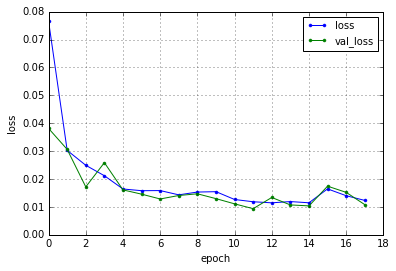

hiden node = 32
-edim=32-Window=2048-Overlap=16-Adagrad
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.0962 - val_loss: 0.0676
Epoch 2/50
4s - loss: 0.0562 - val_loss: 0.0610
Epoch 3/50
3s - loss: 0.0467 - val_loss: 0.0404
Epoch 4/50
4s - loss: 0.0406 - val_loss: 0.0355
Epoch 5/50
3s - loss: 0.0352 - val_loss: 0.0315
Epoch 6/50
3s - loss: 0.0317 - val_loss: 0.0379
Epoch 7/50
3s - loss: 0.0297 - val_loss: 0.0324
Epoch 8/50
3s - loss: 0.0281 - val_loss: 0.0256
Epoch 9/50
3s - loss: 0.0269 - val_loss: 0.0237
Epoch 10/50
3s - loss: 0.0256 - val_loss: 0.0266
Epoch 11/50
3s - loss: 0.0247 - val_loss: 0.0246
Epoch 12/50
4s - loss: 0.0239 - val_loss: 0.0215
Epoch 13/50
4s - loss: 0.0231 - val_loss: 0.0200
Epoch 14/50
3s - loss: 0.0223 - val_loss: 0.0215
Epoch 15/50
4s - loss: 0.0217 - val_loss: 0.0202
Epoch 16/50
4s - loss: 0.0211 - val_loss: 0.0186
Epoch 17/50
3s - loss: 0.0205 - val_loss: 0.0203
Epoch 18/50
4s - loss: 0.0198 - val_loss: 0.0228
Epoch 19/50
3s - loss

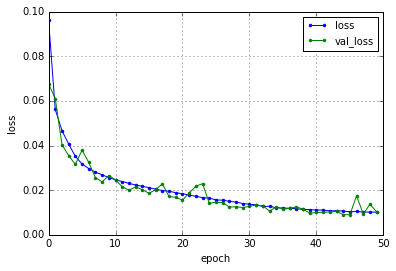

hiden node = 32
-edim=32-Window=2048-Overlap=16-RMSprop
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.0937 - val_loss: 0.0635
Epoch 2/50
3s - loss: 0.0618 - val_loss: 0.0506
Epoch 3/50
3s - loss: 0.0521 - val_loss: 0.0593
Epoch 4/50
3s - loss: 0.0485 - val_loss: 0.0602
Epoch 5/50
3s - loss: 0.0455 - val_loss: 0.0495
Epoch 6/50
3s - loss: 0.0425 - val_loss: 0.0332
Epoch 7/50
3s - loss: 0.0407 - val_loss: 0.0461
Epoch 8/50
3s - loss: 0.0385 - val_loss: 0.0361
Epoch 9/50
3s - loss: 0.0370 - val_loss: 0.0302
Epoch 10/50
3s - loss: 0.0358 - val_loss: 0.0301
Epoch 11/50
3s - loss: 0.0349 - val_loss: 0.0343
Epoch 12/50
3s - loss: 0.0338 - val_loss: 0.0309
Epoch 13/50
3s - loss: 0.0324 - val_loss: 0.0368
Epoch 14/50
3s - loss: 0.0315 - val_loss: 0.0302
Epoch 15/50
4s - loss: 0.0308 - val_loss: 0.0302
Epoch 16/50
5s - loss: 0.0306 - val_loss: 0.0322


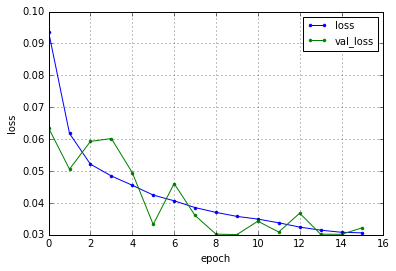

hiden node = 32
-edim=32-Window=2048-Overlap=16-Nadam
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.1066 - val_loss: 0.0826
Epoch 2/50
3s - loss: 0.0801 - val_loss: 0.0686
Epoch 3/50
4s - loss: 0.0663 - val_loss: 0.0564
Epoch 4/50
3s - loss: 0.0591 - val_loss: 0.0504
Epoch 5/50
3s - loss: 0.0497 - val_loss: 0.0471
Epoch 6/50
3s - loss: 0.0521 - val_loss: 0.0450
Epoch 7/50
3s - loss: 0.0523 - val_loss: 0.0512
Epoch 8/50
3s - loss: 0.0534 - val_loss: 0.0465
Epoch 9/50
3s - loss: 0.0542 - val_loss: 0.0733
Epoch 10/50
3s - loss: 0.0575 - val_loss: 0.0483
Epoch 11/50
3s - loss: 0.0516 - val_loss: 0.0661
Epoch 12/50
3s - loss: 0.0568 - val_loss: 0.0635


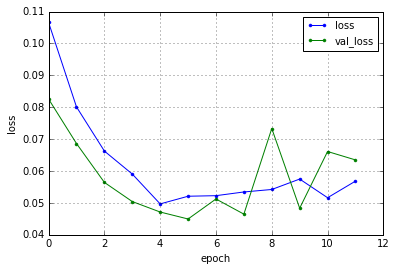

AccX is registed now
Build Complete
(254742,)
windowData's num =15666
SourceData's aborting data = 6
window shape is (15666, 4096, 1)
hiden node = 32
-edim=32-Window=4096-Overlap=16-SGD
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
6s - loss: 0.7294 - val_loss: 0.6955
Epoch 2/50
6s - loss: 0.6580 - val_loss: 0.6209
Epoch 3/50
6s - loss: 0.5867 - val_loss: 0.5537
Epoch 4/50
6s - loss: 0.5239 - val_loss: 0.4953
Epoch 5/50
6s - loss: 0.4694 - val_loss: 0.4447
Epoch 6/50
6s - loss: 0.4224 - val_loss: 0.4010
Epoch 7/50
7s - loss: 0.3817 - val_loss: 0.3632
Epoch 8/50
7s - loss: 0.3464 - val_loss: 0.3304
Epoch 9/50
7s - loss: 0.3159 - val_loss: 0.3019
Epoch 10/50
7s - loss: 0.2892 - val_loss: 0.2770
Epoch 11/50
6s - loss: 0.2659 - val_loss: 0.2552
Epoch 12/50
7s - loss: 0.2454 - val_loss: 0.2359
Epoch 13/50
6s - loss: 0.2273 - val_loss: 0.2190
Epoch 14/50
6s - loss: 0.2113 - val_loss: 0.2040
Epoch 15/50
6s - loss: 0.1973 - val_loss: 0.1908
Epoch 16/50
6s - loss: 0.1849 - val_lo

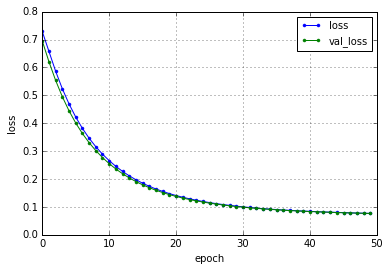

hiden node = 32
-edim=32-Window=4096-Overlap=16-Adadelta
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
6s - loss: 0.1454 - val_loss: 0.0741
Epoch 2/50
6s - loss: 0.0674 - val_loss: 0.0624
Epoch 3/50
6s - loss: 0.0623 - val_loss: 0.0578
Epoch 4/50
6s - loss: 0.0580 - val_loss: 0.0518
Epoch 5/50
7s - loss: 0.0547 - val_loss: 0.0890
Epoch 6/50
7s - loss: 0.0529 - val_loss: 0.0565
Epoch 7/50
6s - loss: 0.0517 - val_loss: 0.0468
Epoch 8/50
7s - loss: 0.0499 - val_loss: 0.0454
Epoch 9/50
6s - loss: 0.0492 - val_loss: 0.0485
Epoch 10/50
6s - loss: 0.0478 - val_loss: 0.0446
Epoch 11/50
6s - loss: 0.0473 - val_loss: 0.0467
Epoch 12/50
8s - loss: 0.0462 - val_loss: 0.0487
Epoch 13/50
7s - loss: 0.0458 - val_loss: 0.0555
Epoch 14/50
7s - loss: 0.0451 - val_loss: 0.0412
Epoch 15/50
6s - loss: 0.0443 - val_loss: 0.0467
Epoch 16/50
6s - loss: 0.0437 - val_loss: 0.0639
Epoch 17/50
6s - loss: 0.0427 - val_loss: 0.0430
Epoch 18/50
7s - loss: 0.0417 - val_loss: 0.0375
Epoch 19/50
7s - los

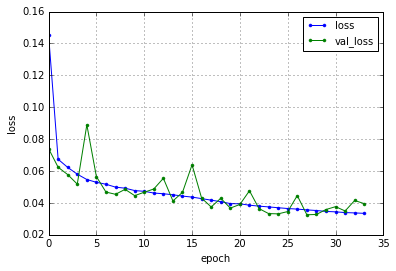

hiden node = 32
-edim=32-Window=4096-Overlap=16-Adamax
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
5s - loss: 0.0837 - val_loss: 0.0632
Epoch 2/50
6s - loss: 0.0415 - val_loss: 0.0332
Epoch 3/50
6s - loss: 0.0320 - val_loss: 0.0379
Epoch 4/50
6s - loss: 0.0262 - val_loss: 0.0215
Epoch 5/50
6s - loss: 0.0222 - val_loss: 0.0194
Epoch 6/50
7s - loss: 0.0205 - val_loss: 0.0185
Epoch 7/50
8s - loss: 0.0180 - val_loss: 0.0462
Epoch 8/50
7s - loss: 0.0175 - val_loss: 0.0148
Epoch 9/50
7s - loss: 0.0166 - val_loss: 0.0136
Epoch 10/50
6s - loss: 0.0154 - val_loss: 0.0126
Epoch 11/50
6s - loss: 0.0152 - val_loss: 0.0189
Epoch 12/50
6s - loss: 0.0152 - val_loss: 0.0132
Epoch 13/50
6s - loss: 0.0148 - val_loss: 0.0150
Epoch 14/50
6s - loss: 0.0141 - val_loss: 0.0114
Epoch 15/50
7s - loss: 0.0140 - val_loss: 0.0139
Epoch 16/50
6s - loss: 0.0132 - val_loss: 0.0116
Epoch 17/50
6s - loss: 0.0125 - val_loss: 0.0117
Epoch 18/50
6s - loss: 0.0129 - val_loss: 0.0121
Epoch 19/50
6s - loss:

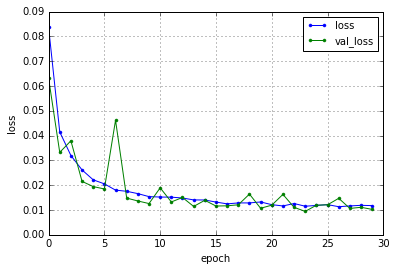

hiden node = 32
-edim=32-Window=4096-Overlap=16-Adam
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
7s - loss: 0.0999 - val_loss: 0.0702
Epoch 2/50
6s - loss: 0.0600 - val_loss: 0.0567
Epoch 3/50
6s - loss: 0.0556 - val_loss: 0.0550
Epoch 4/50
6s - loss: 0.0537 - val_loss: 0.0536
Epoch 5/50
6s - loss: 0.0514 - val_loss: 0.0511
Epoch 6/50
6s - loss: 0.0459 - val_loss: 0.0426
Epoch 7/50
6s - loss: 0.0436 - val_loss: 0.0412
Epoch 8/50
6s - loss: 0.0413 - val_loss: 0.0468
Epoch 9/50
6s - loss: 0.0427 - val_loss: 0.0451
Epoch 10/50
6s - loss: 0.0396 - val_loss: 0.0383
Epoch 11/50
6s - loss: 0.0390 - val_loss: 0.0372
Epoch 12/50
7s - loss: 0.0365 - val_loss: 0.0338
Epoch 13/50
8s - loss: 0.0362 - val_loss: 0.0534
Epoch 14/50
6s - loss: 0.0366 - val_loss: 0.0321
Epoch 15/50
7s - loss: 0.0336 - val_loss: 0.0330
Epoch 16/50
6s - loss: 0.0337 - val_loss: 0.0341
Epoch 17/50
6s - loss: 0.0329 - val_loss: 0.0321
Epoch 18/50
6s - loss: 0.0310 - val_loss: 0.0291
Epoch 19/50
7s - loss: 0

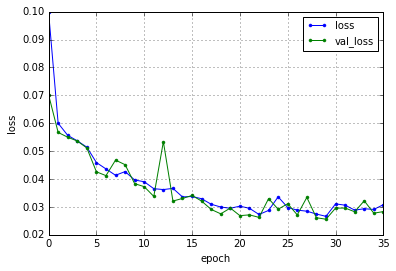

hiden node = 32
-edim=32-Window=4096-Overlap=16-Adagrad
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
6s - loss: 0.1049 - val_loss: 0.0824
Epoch 2/50
6s - loss: 0.0716 - val_loss: 0.0639
Epoch 3/50
7s - loss: 0.0599 - val_loss: 0.0561
Epoch 4/50
8s - loss: 0.0545 - val_loss: 0.0521
Epoch 5/50
6s - loss: 0.0511 - val_loss: 0.0508
Epoch 6/50
6s - loss: 0.0486 - val_loss: 0.0476
Epoch 7/50
8s - loss: 0.0464 - val_loss: 0.0465
Epoch 8/50
7s - loss: 0.0446 - val_loss: 0.0454
Epoch 9/50
7s - loss: 0.0432 - val_loss: 0.0439
Epoch 10/50
7s - loss: 0.0418 - val_loss: 0.0408
Epoch 11/50
6s - loss: 0.0408 - val_loss: 0.0420
Epoch 12/50
7s - loss: 0.0400 - val_loss: 0.0409
Epoch 13/50
6s - loss: 0.0394 - val_loss: 0.0384
Epoch 14/50
7s - loss: 0.0388 - val_loss: 0.0381
Epoch 15/50
6s - loss: 0.0382 - val_loss: 0.0376
Epoch 16/50
6s - loss: 0.0378 - val_loss: 0.0372
Epoch 17/50
6s - loss: 0.0373 - val_loss: 0.0365
Epoch 18/50
6s - loss: 0.0369 - val_loss: 0.0374
Epoch 19/50
6s - loss

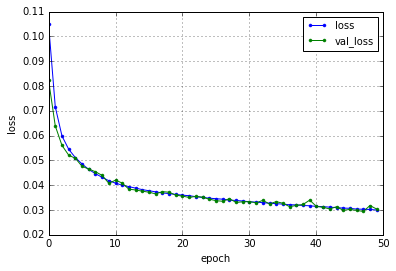

hiden node = 32
-edim=32-Window=4096-Overlap=16-RMSprop
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
6s - loss: 0.1163 - val_loss: 0.0865
Epoch 2/50
6s - loss: 0.0754 - val_loss: 0.0646
Epoch 3/50
6s - loss: 0.0594 - val_loss: 0.0583
Epoch 4/50
6s - loss: 0.0536 - val_loss: 0.0536
Epoch 5/50
6s - loss: 0.0499 - val_loss: 0.0445
Epoch 6/50
6s - loss: 0.0479 - val_loss: 0.0706
Epoch 7/50
6s - loss: 0.0466 - val_loss: 0.0522
Epoch 8/50
6s - loss: 0.0454 - val_loss: 0.0420
Epoch 9/50
6s - loss: 0.0446 - val_loss: 0.0411
Epoch 10/50
6s - loss: 0.0433 - val_loss: 0.0436
Epoch 11/50
6s - loss: 0.0425 - val_loss: 0.0390
Epoch 12/50
6s - loss: 0.0411 - val_loss: 0.0382
Epoch 13/50
6s - loss: 0.0412 - val_loss: 0.0437
Epoch 14/50
6s - loss: 0.0410 - val_loss: 0.0406
Epoch 15/50
6s - loss: 0.0406 - val_loss: 0.0393
Epoch 16/50
6s - loss: 0.0402 - val_loss: 0.0395
Epoch 17/50
6s - loss: 0.0395 - val_loss: 0.0410
Epoch 18/50
6s - loss: 0.0392 - val_loss: 0.0399


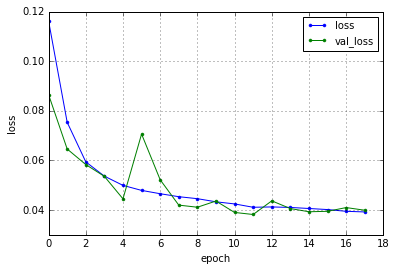

hiden node = 32
-edim=32-Window=4096-Overlap=16-Nadam
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
6s - loss: 0.1188 - val_loss: 0.0938
Epoch 2/50
6s - loss: 0.0929 - val_loss: 0.0889
Epoch 3/50
7s - loss: 0.0907 - val_loss: 0.0877
Epoch 4/50
6s - loss: 0.0800 - val_loss: 0.0767
Epoch 5/50
6s - loss: 0.0715 - val_loss: 0.0670
Epoch 6/50
6s - loss: 0.0667 - val_loss: 0.0632
Epoch 7/50
5s - loss: 0.0637 - val_loss: 0.0648
Epoch 8/50
5s - loss: 0.0623 - val_loss: 0.0612
Epoch 9/50
5s - loss: 0.0622 - val_loss: 0.0682
Epoch 10/50
6s - loss: 0.0604 - val_loss: 0.0543
Epoch 11/50
6s - loss: 0.0564 - val_loss: 0.0569
Epoch 12/50
6s - loss: 0.0556 - val_loss: 0.0560
Epoch 13/50
6s - loss: 0.0545 - val_loss: 0.0564
Epoch 14/50
7s - loss: 0.0535 - val_loss: 0.0504
Epoch 15/50
6s - loss: 0.0531 - val_loss: 0.0526
Epoch 16/50
6s - loss: 0.0538 - val_loss: 0.0529
Epoch 17/50
6s - loss: 0.0560 - val_loss: 0.0542
Epoch 18/50
6s - loss: 0.0529 - val_loss: 0.0503
Epoch 19/50
6s - loss: 

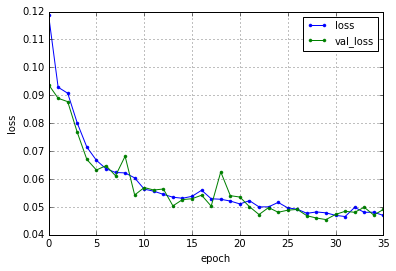

In [8]:
# loop windowWidth
for SampleNum,Overlap in zip(WindowWidth,OverlapArray):
    w=window.Window()
    w.SetData(Axis,dic[Axis])
    wind=w.Compile(windowWidth=SampleNum,overlapNum=Overlap)
    windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))
    
    for opt,optName in zip(optimizers,optimArray):
        print "hiden node = "+str(encoding_dim)
        CommonName='-edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap)+'-'+optName
        print CommonName
        SaveFileNameEncord=DataName+'_encoded'+CommonName
        SaveFileNameDecord=DataName+'_decoded'+CommonName
        SaveFileNameNet=DataName+'_net'+CommonName
        SaveFileNameTrain=DataName+'_train'+CommonName
        SaveFileNameTest=DataName+'_test'+CommonName
        SaveFileNameGlaph=GlaphDataPath+DataName+CommonName+'_loss_val_loss.png'

        window_test=windoW
        window_train=windoW
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
        shapeNum=windoW.shape[1]

        # this is our input placeholder
        input_img = Input(shape=(shapeNum,))
        # "encoded" is the encoded representation of the input
        encoded = Dense(encoding_dim, activation='tanh')(input_img)
        # "decoded" is the lossy reconstruction of the input
        decoded = Dense(shapeNum, activation='linear')(encoded)

        # this model maps an input to its reconstruction
        autoencoder = Model(input=input_img, output=decoded)

        # this model maps an input to its encoded representation
        encoder = Model(input=input_img, output=encoded)

        # create a placeholder for an encoded (32-dimensional) input
        encoded_input = Input(shape=(encoding_dim,))
        # retrieve the last layer of the autoencoder model
        decoder_layer = autoencoder.layers[-1]
        # create the decoder model
        decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

        autoencoder.compile(optimizer=opt(), loss='mse')
        plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

        early_stopping = EarlyStopping(monitor='val_loss', patience=5)
        hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=50,
                        verbose=2,
                        batch_size=32,
                        shuffle=True,
                        validation_data=(window_test, window_test),
                        callbacks=[early_stopping])
        time.sleep(0.1)
        encoded_imgs = encoder.predict(window_test)
        decoded_imgs = decoder.predict(encoded_imgs)

        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

        # save model and wights
        json_string = encoder.to_json()
        open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
        encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

        json_string = decoder.to_json()
        open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
        decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

        json_string = autoencoder.to_json()
        open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
        autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

        # plot loss
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']

        nb_epoch = len(loss)
        plt.plot(range(nb_epoch), loss, marker='.', label='loss')
        plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
        plt.legend(loc='best', fontsize=10)
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.savefig(SaveFileNameGlaph)
        plt.show()

In [9]:
print "finish"

finish
